In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import meanderpy as mp             
from importlib import reload
reload(mp)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
mpl.rcParams['figure.dpi'] = 500
import scipy.stats as stats          
import seaborn as sns                   
from scipy import interpolate          
import random

In [3]:
os.chdir(r"/Users/braydennoh/Desktop/meanderpy/january/module2/edit/bend1")
cl1=np.loadtxt('0.1.txt',delimiter=' ')
cl2=np.loadtxt('10.1.txt',delimiter=' ')

y = cl1[:,0][::-1]
x = cl1[:,1][::-1]
y1 = cl2[:,0][::-1]
x1= cl2[:,1][::-1]

In [12]:
nit = 100                    # number of iterations
W = 100.0                    # channel width (m)
D = 10.0                      # channel depth (m)
depths = D * np.ones((nit,))  # channel depths for different iterations  
pad = 0# padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline           
Cfs = 0.02 * np.ones((nit,))
crdist = 1.8 * W               # threshold distance at which cutoffs occur
kl = 200/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 0.1*(365*24*60*60.0)      # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 1                # which time steps will be saved
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 0                    # time step when incision starts
t2 = 0                    # time step when lateral migration starts
t3 = 0     
aggr_factor = 2e-9            # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3) after t3)
sc = 1.0
y=cl1[:,0]*10
x=cl1[:,1]*10
z=np.zeros(len(x))
H=depths[0]

ch=mp.Channel(-x,-y,z,W,H)
chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
channel_coordinate = pd.DataFrame({"x":chb.channels[nit-1].x, "y":chb.channels[nit-1].y, "Z":chb.channels[nit-1].z}) # the way it work is this: chb.channels[i].x will give you the x coordinates for the ith time step

synx = 0.1*chb.channels[np.int(nit-1)].x
syny = 0.1*chb.channels[np.int(nit-1)].y

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1055.34it/s]
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_37415/3286396769.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  synx = 0.1*chb.channels[np.int(nit-1)].x
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_37415/3286396769.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use 

In [13]:
t = np.linspace(0,1,np.shape(cl1[:,])[0]) # create a new variable t 
x_o = -cl1[:,1].flatten()            # get x-axis data
y_o = -cl1[:,0].flatten()            # get y-axis data
fx_o = interpolate.interp1d(t,x_o)      # initialize the interpolation class
fy_o = interpolate.interp1d(t, y_o)    
tnew = np.linspace(0,1,1000)   
xnew_o = fx_o(tnew) + np.random.normal(0,0.1,1000)  # get interpolated x values
ynew_o = fy_o(tnew) + np.random.normal(0,0.1,1000)# create a finer t-variable spacing 
xnew_o = fx_o(tnew)   # get interpolated x values
ynew_o = fy_o(tnew)   # get interpolated y values
data_obs_ins = np.array([xnew_o,ynew_o])
data_obs_ins = np.round(data_obs_ins, 2) 
#data_obs_ins =np.flip(data_obs_ins, axis=1)

t = np.linspace(0,1,np.shape(cl2[:,])[0]) # create a new variable t 
x_o = -cl2[:,1].flatten()            # get x-axis data
y_o = -cl2[:,0].flatten()            # get y-axis data
fx_o = interpolate.interp1d(t,x_o)      # initialize the interpolation class
fy_o = interpolate.interp1d(t, y_o)    
tnew = np.linspace(0,1,1000)           # create a finer t-variable spacing 
xnew_o = fx_o(tnew)                     # get interpolated x values
ynew_o = fy_o(tnew)
data_obs = np.array([xnew_o,ynew_o])
data_obs = np.flip(data_obs, axis=1)
data_obs = np.round(data_obs, 1)
# modelled

t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
x_m = 0.1*chb.channels[np.int(nit-1)].x
y_m = 0.1*chb.channels[np.int(nit-1)].y
fx_m = interpolate.interp1d(t,x_m)
fy_m = interpolate.interp1d(t, y_m)
tnew = np.linspace(0,1,1000)
xnew_m = fx_m(tnew)
ynew_m = fy_m(tnew)
ynew_ms = ynew_m+np.random.normal(loc=0.0, scale= 0.1, size=1)
xnew_ms = xnew_m+np.random.normal(loc=0.0, scale= 0.1, size=1)
ynew_ms = ynew_m
xnew_ms = xnew_m

/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_37415/458386601.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_37415/458386601.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. 

In [14]:
data_obs =np.flip(data_obs, axis=1)
err1 = data_obs_ins[0,:] - data_obs[0,:]
err2 = xnew_ms - data_obs[0,:]

In [15]:
nit = 100                   
depths = D * np.ones((nit,)) 
pad = 0                 
deltas = 50.0               
crdist = 1.8 * W              
kv =  1.0e-12             
dt = 0.1*(365*24*60*60.0)    
dens = 1000               
saved_ts = 1              
n_bends = 5              
Sl = 0.0            
t1 = 0                  
t2 = 0                  
t3 = 0      

def hkm(parm):  
    kl =  (parm[0]*10)/(365*24*60*60.0)  
    Cfs = parm[1] * 0.001 * np.ones((nit,))
    y=cl1[:,0]*10
    x=cl1[:,1]*10
    z=np.zeros(len(x))
    H=depths[0]

    try:    
        ch=mp.Channel(-x,-y,z,W,H)
        chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
        ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
        chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration

        if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 1000:
            t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
            x_m = 0.1*chb.channels[np.int(nit-1)].x
            y_m = 0.1*chb.channels[np.int(nit-1)].y

            fx_m = interpolate.interp1d(t,x_m)
            fy_m = interpolate.interp1d(t, y_m)

            tnew = np.linspace(0,1,1000)
            xnew_m = fx_m(tnew) 
            ynew_m = fy_m(tnew) 
            xnew_m[:] = xnew_m[::-1] 
            ynew_m[:] = ynew_m[::-1] 
        
        else:
            t = np.linspace(0,1,1000)
            xnew_m = np.zeros(1000) 
            ynew_m = np.zeros(1000) 
            ynew_m[:] = ynew_m[::-1] 
            xnew_m[:] = xnew_m[::-1] 

    except:
        t = np.linspace(0,1,1000)
        xnew_m = np.zeros(1000) 
        ynew_m = np.zeros(1000) 
        ynew_m[:] = ynew_m[::-1] 
        xnew_m[:] = xnew_m[::-1] 
        
    return np.array([xnew_m,ynew_m])

[15 20  1]
[15 20  1]


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1489.22it/s]
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_37415/115302430.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 1000:
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_37415/115302430.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you m

-4700.066889149216

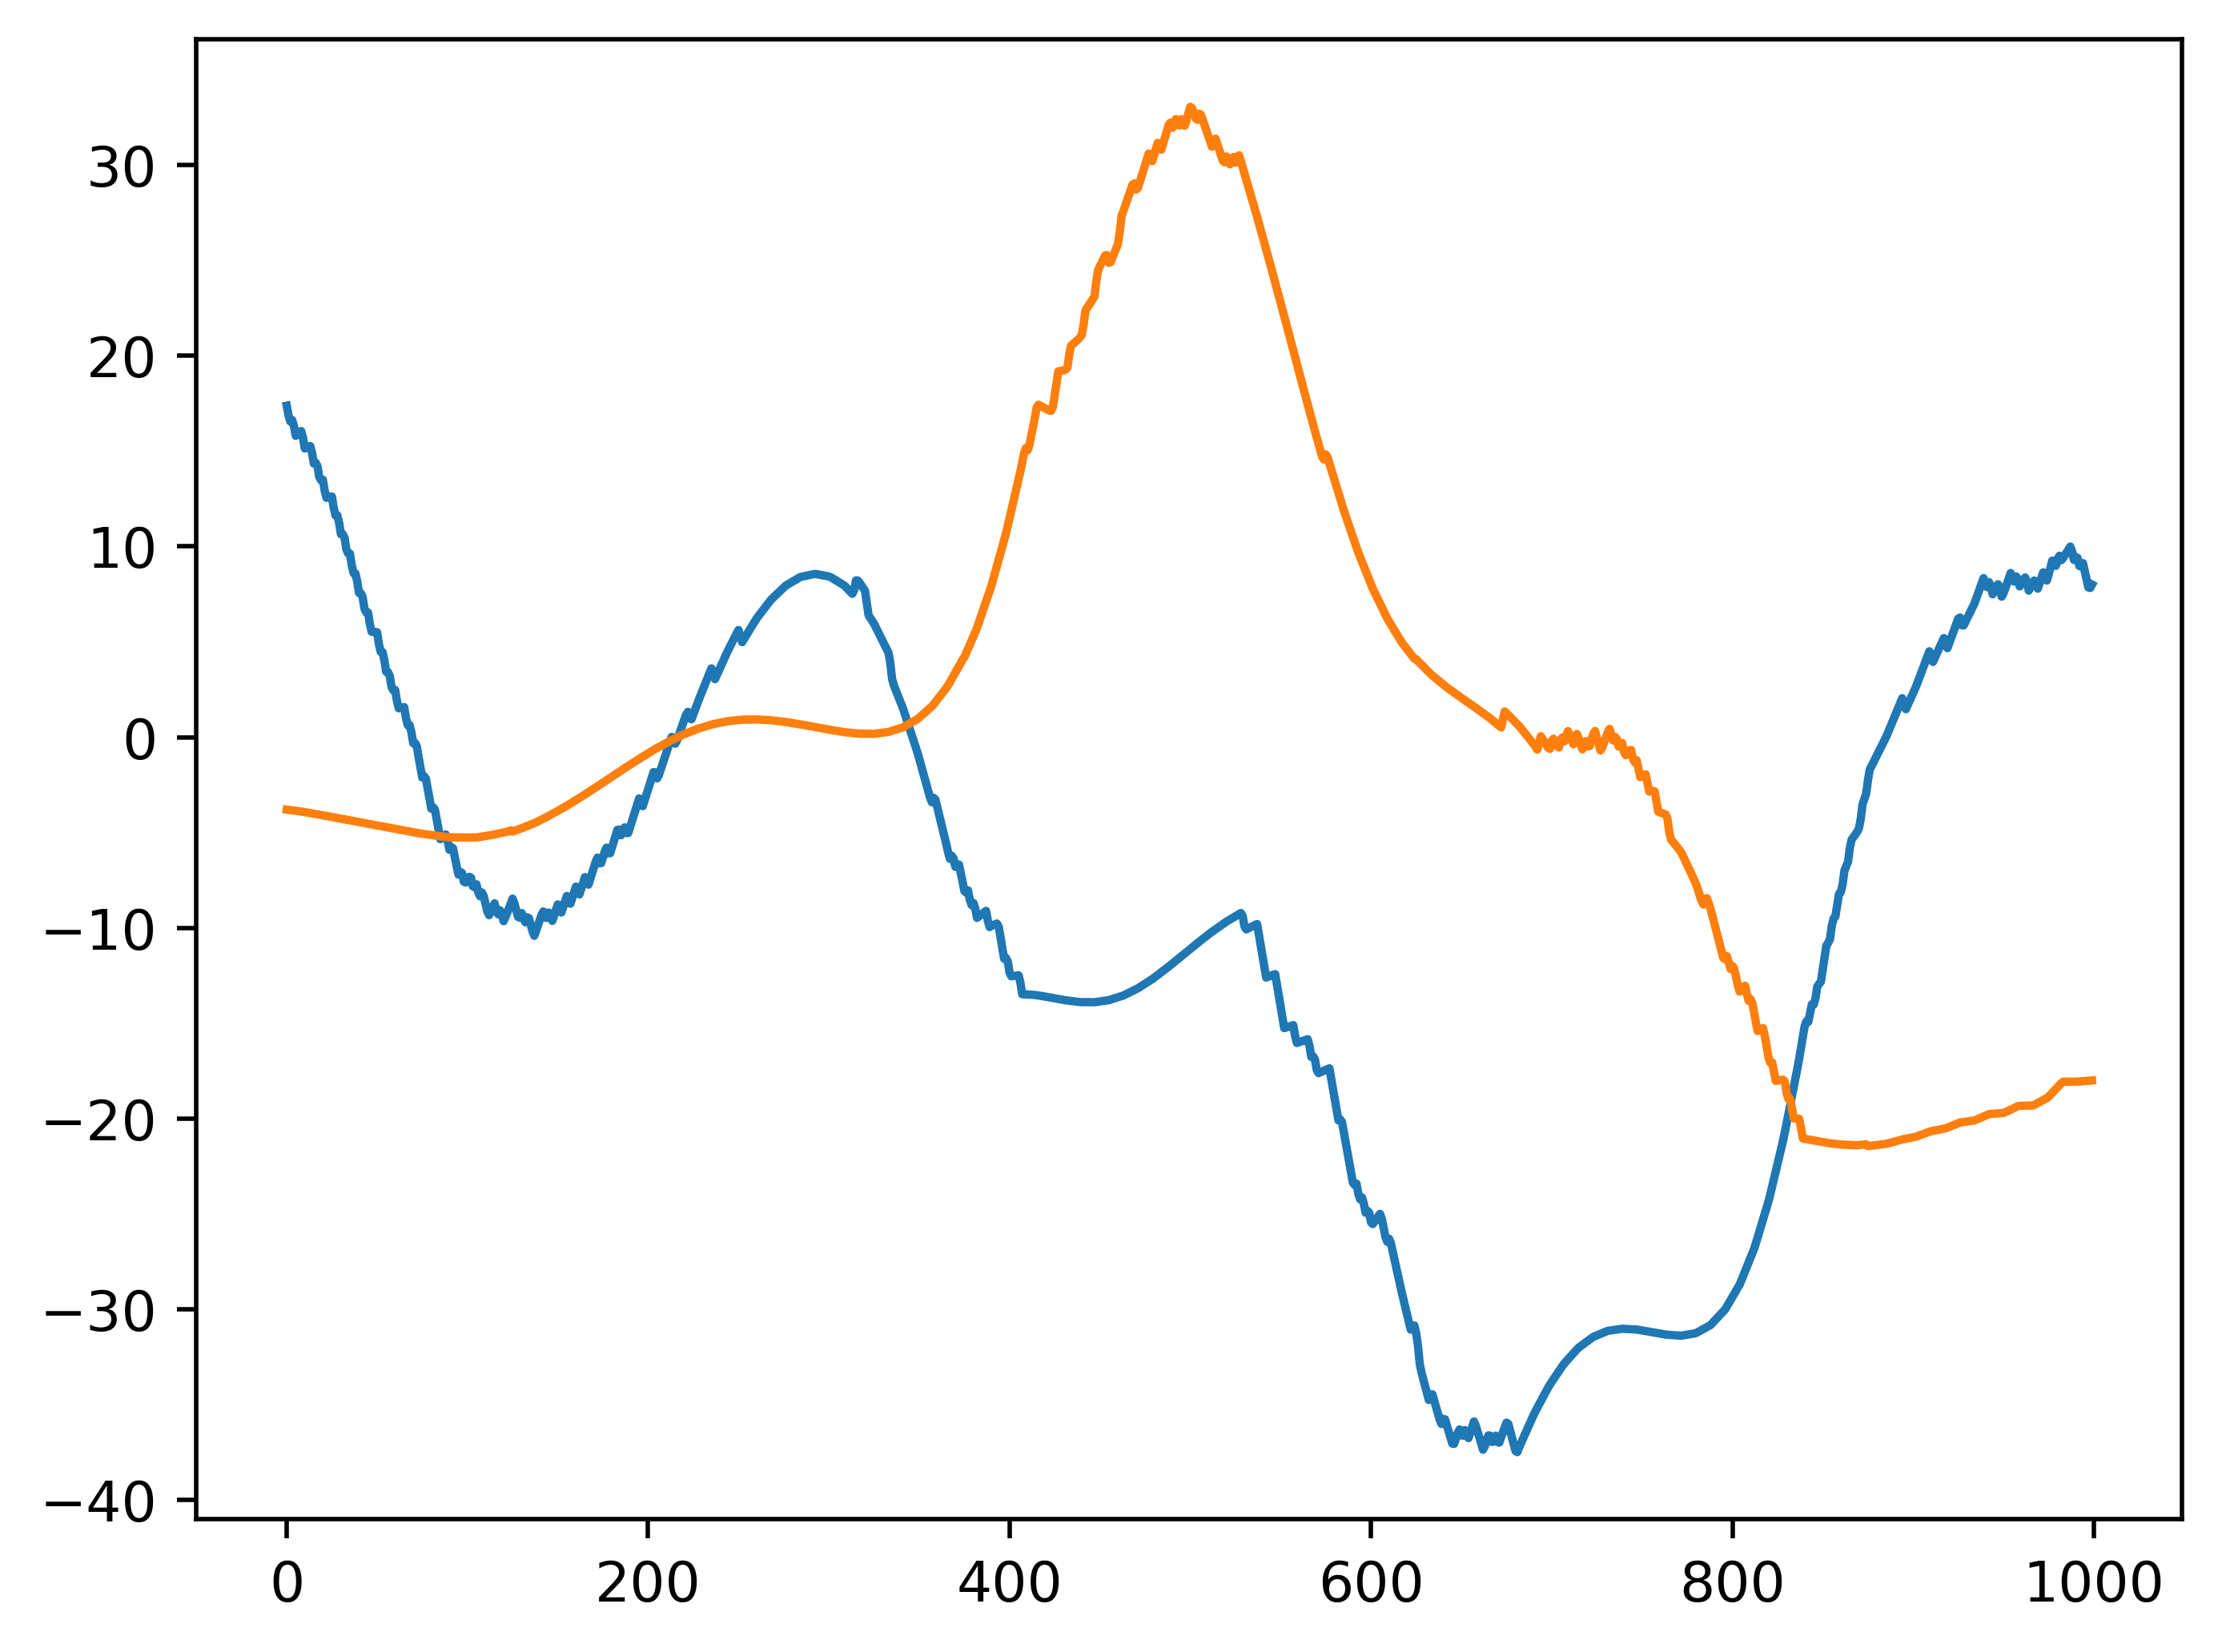

In [8]:
def log_prior(par):
    
    if  10 < par[0] < 50 and 0 < par[1] < 30 and 0.01 < par[2] < 10:   # define the bounds of the prior   
        return -par[2]/1                           # return the exponential distribution
    else:
        return -np.inf
    
def log_lik(par,data):
    print(par)
    sim = hkm(parm=par[:2])
    
    x_err = sim[0,:]-data[0,:][::-1]
    y_err = sim[1,:]-data[1,:][::-1]
    plt.plot(x_err) 
    plt.plot(y_err) 

    y_fft = np.fft.fft(y_err)  # do the fast fourier transform of y-errrors
    x_fft = np.fft.fft(x_err)  # do the fast fourier transform of x-errrors
    
    y_amp1 = 2*abs(y_fft.real/y_fft.size)      # retrieve amplitude of cos function
    y_amp2 = 2*abs(y_fft.imag/y_fft.size)      # retrieve amplitude of sin function
    x_amp1 = 2*abs(x_fft.real/x_fft.size)      # retrieve amplitude of cos function
    x_amp2 = 2*abs(x_fft.imag/x_fft.size)      # retrieve amplitude of sin function
    
    amp = np.array([y_amp1,y_amp2,x_amp1,x_amp2]) # write all four amplitudes in one array 
    
    return np.sum(np.log(stats.norm.pdf(amp, loc=0, scale=par[2]))) # evaluate the probability density of the amp array

def log_post(par, data):
    par = np.around(par, decimals = 0)
    print (par)
    if (log_prior(par)==-np.inf):
        lp = log_prior(par)
    else: 
        lp = log_lik(par,data)+ log_prior(par)
    return lp  

#Test Run
log_post([15,20 ,1],data_obs)

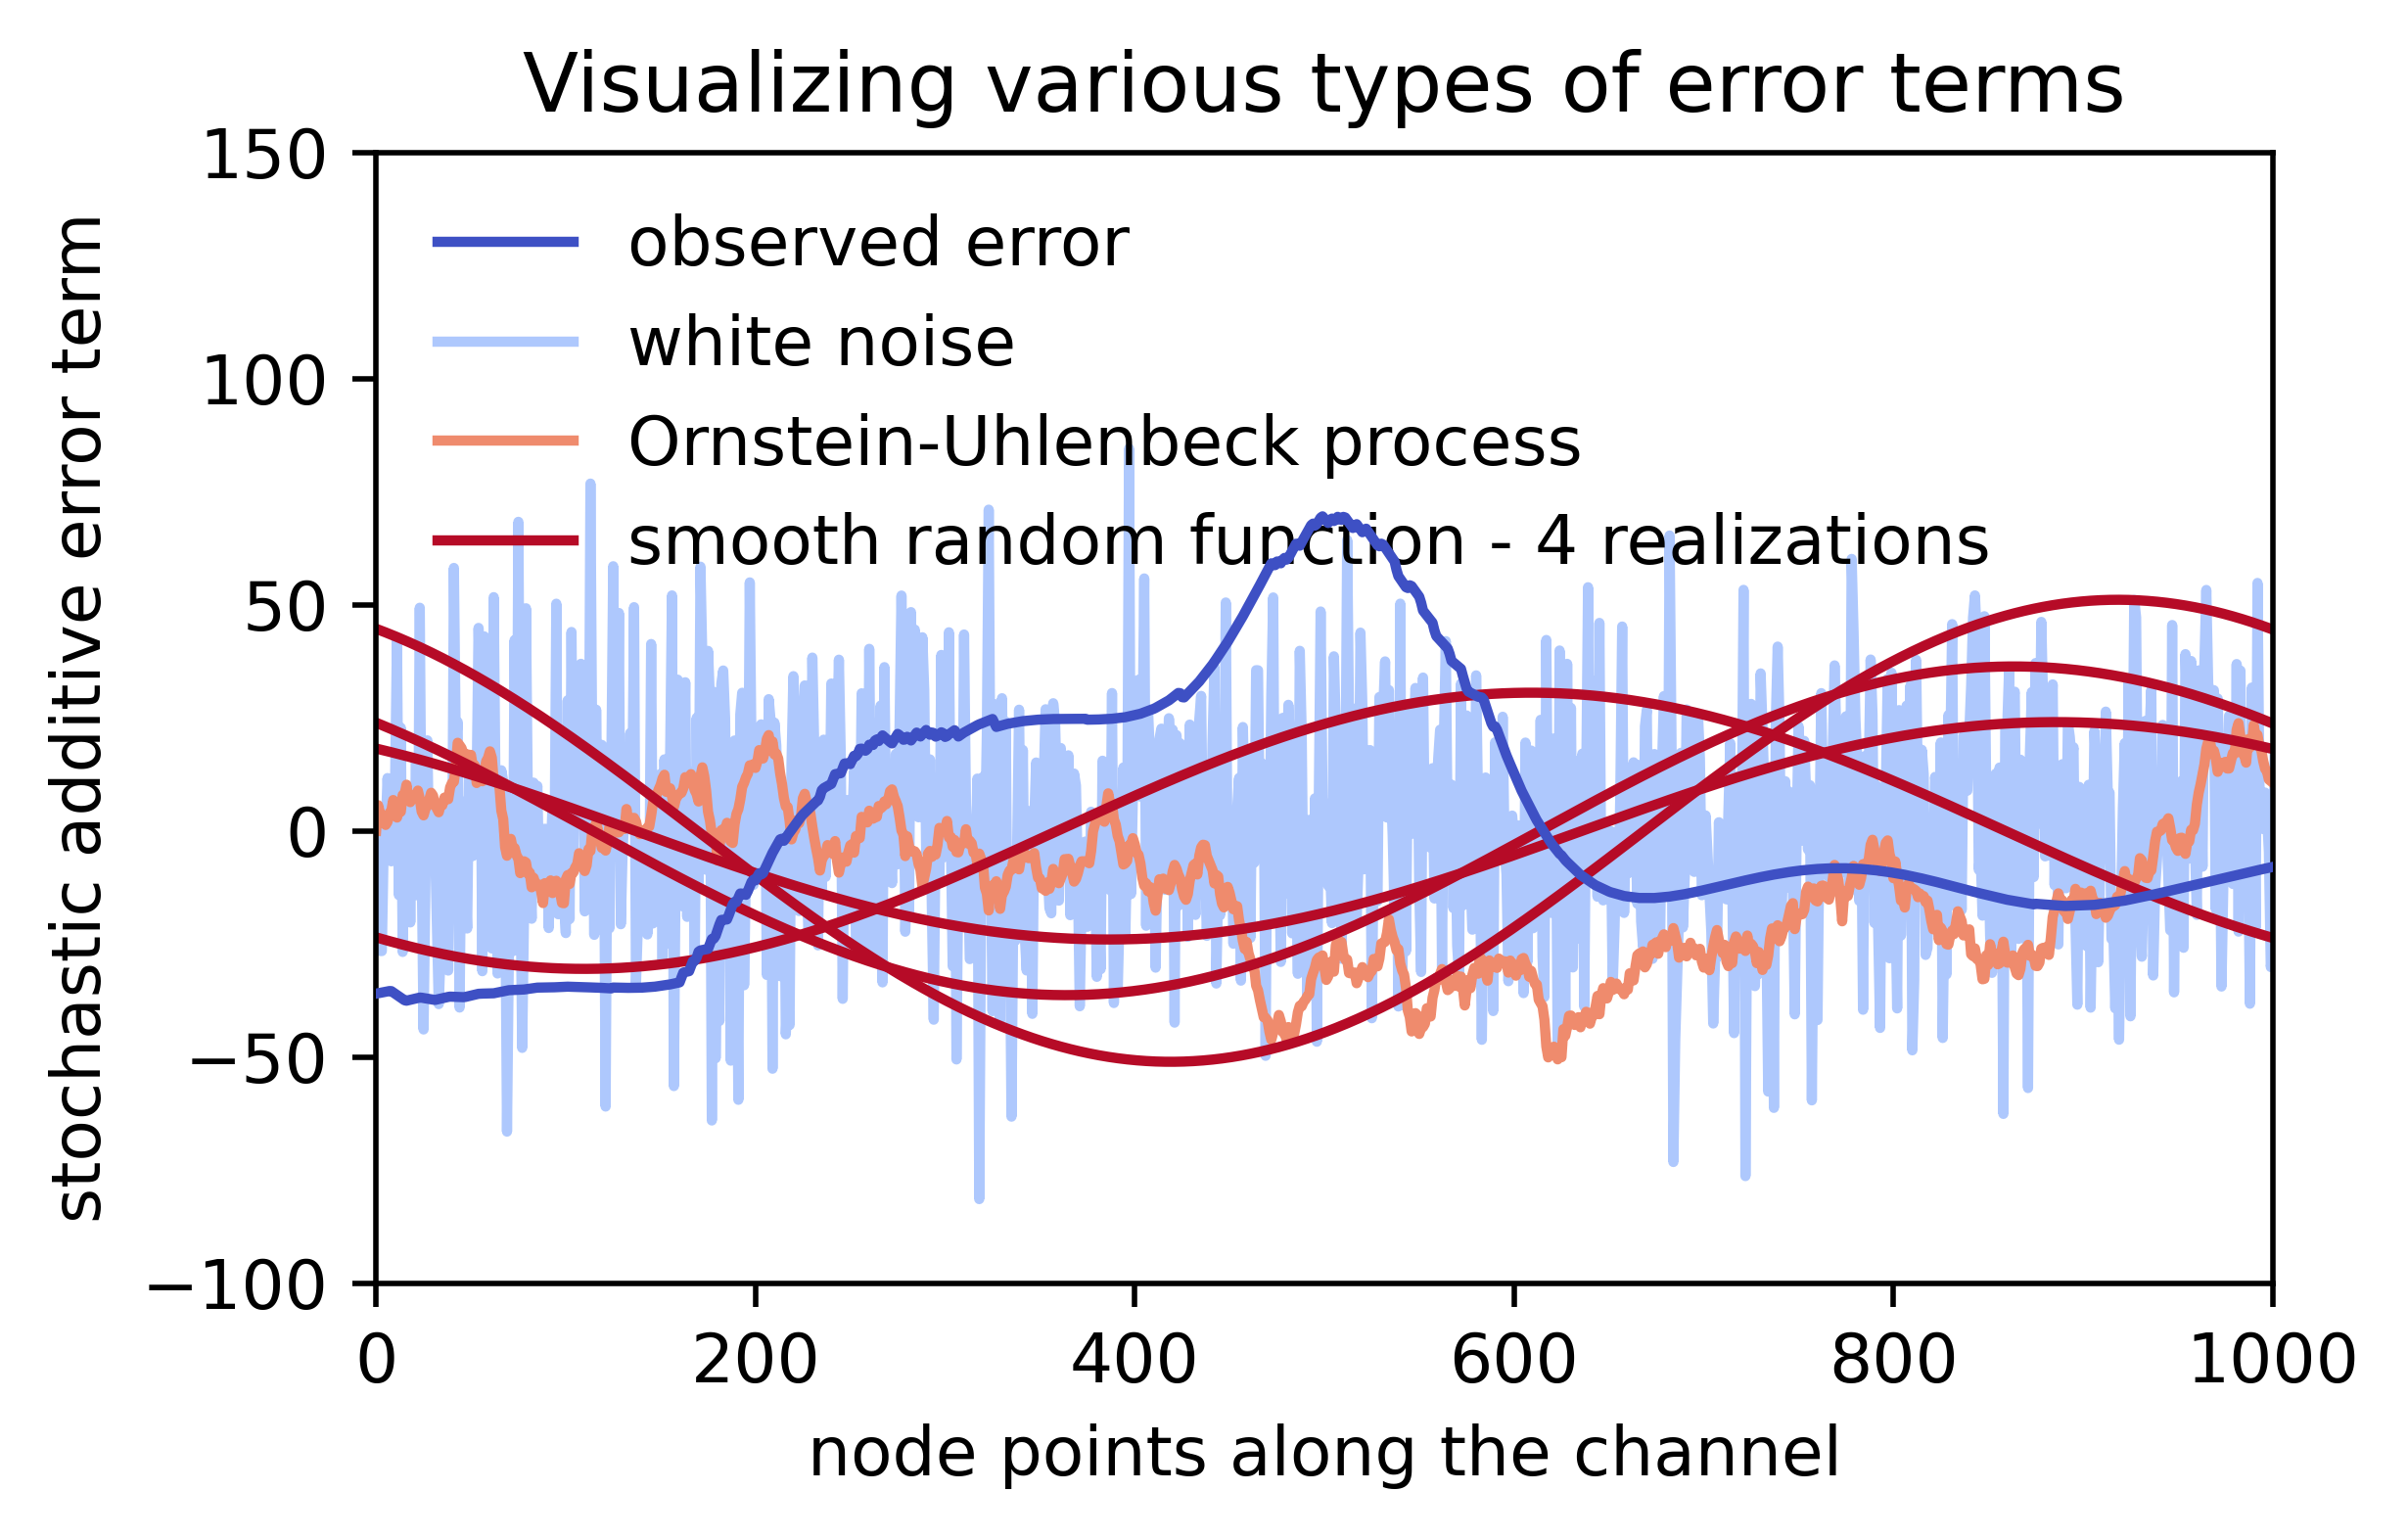

In [16]:
x_err = xnew_ms - data_obs[0,:]
y_err = ynew_ms - data_obs[1,:]

yss = np.zeros([1000,1000])
del_x = np.linspace(0,1,1000)
for i in range(0,1000):
    yss[:,i]= 2*(np.random.normal(0,1,1)*np.cos(2*np.pi*del_x)+np.random.normal(0,1,1)*np.sin(2*np.pi*del_x))

# ar1 process (ornstein-uhlenbeck process)
ys = np.zeros(1000)
for i in range(0,1000-1):
    ys[i+1]= ys[i]*0.999+np.random.normal(0,1,1)
    
fig, ax = plt.subplots(figsize=(5,3))

# plot various error terms 
plt.plot(2*y_err, label="observed error",color='#3e50c4',zorder=10)
plt.plot(0.5*np.random.normal(0,50,10000),label="white noise",color="#aec8fd",zorder=1)
plt.plot(2*ys, label="Ornstein-Uhlenbeck process",color='#ef8b6d')
plt.plot(10*yss[:,0:1], label="smooth random function - 4 realizations",color="#b60b27")
plt.plot(10*yss[:,14:15],color="#b60b27")
plt.plot(10*yss[:,59:60],color="#b60b27")
plt.plot(10*yss[:,100:101],color="#b60b27")
plt.ylabel("stochastic additive error term")
plt.xlabel("node points along the channel")
plt.legend(loc="lower right", prop={'size': 5})
plt.title("Visualizing various types of error terms")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
plt.ylim([-100, 150])
plt.xlim([0, 1000])

plt.legend(frameon=False,labelcolor='black',loc="upper left")
